In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | The flight was comfortable eno...
1,✅ Trip Verified | We had a really good flying...
2,✅ Trip Verified | Waited an hour to check-in ...
3,Not Verified | Not a great experience at all...
4,✅ Trip Verified | Boarding was difficult caus...


In [5]:
df.to_csv("BA_reviews.csv", index=False)

In [6]:
df = pd.read_csv('BA_reviews.csv')

In [7]:
df.shape

(1000, 1)

In [14]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [15]:
df

,reviews
0,None
1,We had a really good flying experience with ...
2,Waited an hour to check-in at the Paphos bus...
3,None
4,Boarding was difficult caused by vast majori...
...,...
995,London to Seville. Following on from mistake...
996,Doha to Paris via London. This is the first ...
997,Madrid to London BA0457 on the 18/03. Couldn...
998,"On the flight to Tokyo, I was separated from ..."


In [16]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,None,None
1,We had a really good flying experience with ...,We had a really good flying experience with B...
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...
3,None,None
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...


In [17]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...


In [18]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,None,None,"[(None, n)]"
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie..."
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ..."
3,None,None,"[(None, n)]"
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (..."


In [20]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,None,None,"[(None, n)]",None
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie...",really good fly experience BA travel young f...
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ...",Waited hour check Paphos business check Staf...
3,None,None,"[(None, n)]",None
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...


In [21]:
df[['reviews','Lemma']]

,reviews,Lemma
0,None,None
1,We had a really good flying experience with ...,really good fly experience BA travel young f...
2,Waited an hour to check-in at the Paphos bus...,Waited hour check Paphos business check Staf...
3,None,None
4,Boarding was difficult caused by vast majori...,Boarding difficult cause vast majority passe...
...,...,...
995,London to Seville. Following on from mistake...,London Seville Following mistakenly book ret...
996,Doha to Paris via London. This is the first ...,Doha Paris via London first time use BA sinc...
997,Madrid to London BA0457 on the 18/03. Couldn...,Madrid London BA good service Long time sinc...
998,"On the flight to Tokyo, I was separated from ...",flight Tokyo separate wife even though honey...


In [22]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------------- -------------------- 61.4/126.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,None,None,"[(None, n)]",None,0.0000,Neutral
1,We had a really good flying experience with ...,We had a really good flying experience with B...,"[(really, r), (good, a), (flying, v), (experie...",really good fly experience BA travel young f...,0.9788,Positive
2,Waited an hour to check-in at the Paphos bus...,Waited an hour to check in at the Paphos busi...,"[(Waited, v), (hour, n), (check, v), (Paphos, ...",Waited hour check Paphos business check Staf...,-0.8101,Negative
3,None,None,"[(None, n)]",None,0.0000,Neutral
4,Boarding was difficult caused by vast majori...,Boarding was difficult caused by vast majorit...,"[(Boarding, n), (difficult, a), (caused, v), (...",Boarding difficult cause vast majority passe...,0.9343,Positive


In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    373
Neutral     314
Negative    313
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21530caddd0>,
 [Text(0.4273288342009459, 1.0136025194623683, 'Positive'),
  Text(-1.080515974257694, -0.20611945413751373, 'Neutral'),
  Text(0.7482557190187537, -1.123660704552637, 'Negative')],
 [Text(0.23308845501869774, 0.5528741015249281, '37.3%'),
  Text(-0.5893723495951058, -0.11242879316591657, '31.4%'),
  Text(0.47112397123403005, -0.7074900732368453, '31.3%')])

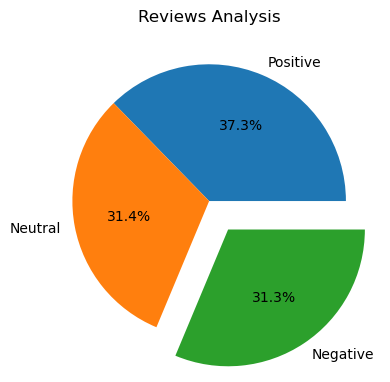

In [25]:
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [27]:
df.to_csv("BA_reviews.csv")

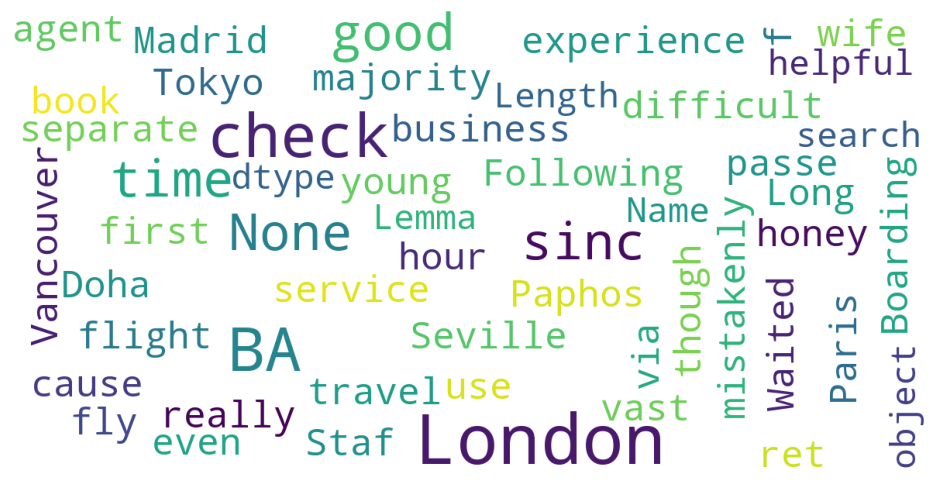

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)